![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [70]:
# Start your code here!
import pandas as pd
men=pd.read_csv('men_results.csv')
women=pd.read_csv('women_results.csv')

In [71]:
men['date']=pd.to_datetime(men['date'])

In [72]:
men_2002 = men[men['date'].dt.year >= 2002]

In [73]:
women['date']=pd.to_datetime(women['date'])
women_2002 = women[women['date'].dt.year >= 2002]

In [74]:
men_2002['goals']=men_2002['home_score']+men_2002['away_score']
men_2002

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals
24863,24863,2002-01-04,Bahrain,Finland,0,2,Prime Minister's Cup,2
24864,24864,2002-01-04,Egypt,Ghana,2,0,Friendly,2
24865,24865,2002-01-04,Martinique,Guadeloupe,1,3,Friendly,4
24866,24866,2002-01-05,Albania,North Macedonia,0,0,Prime Minister's Cup,0
24867,24867,2002-01-05,Kuwait,Zimbabwe,3,0,Friendly,3
...,...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly,1
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly,1
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly,4


In [75]:
men_world=men_2002[men_2002['tournament']=='FIFA World Cup']
men_world['group']='men'

In [76]:
men_world

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals,group
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men
...,...,...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup,3,men
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3,men
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2,men
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3,men


In [77]:
women_2002['goals']=women_2002['home_score']+women_2002['away_score']
women_world=women_2002[women_2002['tournament']=='FIFA World Cup']
women_world['group']='women'

In [78]:
women_world

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals,group
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3,women
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2,women
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5,women
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6,women
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4,women
...,...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3,women
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3,women
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1,women
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3,women


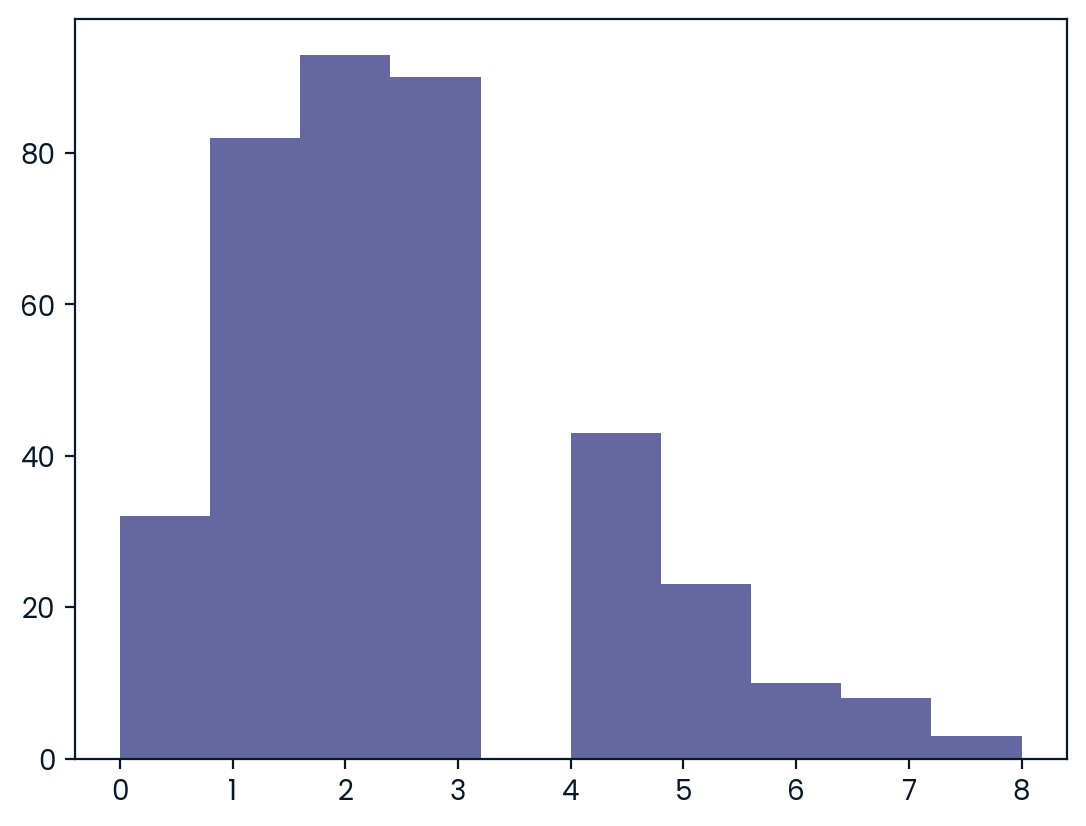

In [79]:
import matplotlib.pyplot as plt
plt.hist(data=men_world,x='goals')
plt.show()

In [80]:
both=pd.concat([men_world,women_world],axis=0,ignore_index=True)

In [81]:
both

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,goals,group
0,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,men
1,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,men
2,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,men
3,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,men
4,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,men
...,...,...,...,...,...,...,...,...,...
579,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3,women
580,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3,women
581,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1,women
582,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3,women


In [82]:
import pingouin
from scipy.stats import mannwhitneyu

In [83]:
both_subset = both[["goals", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals")

In [84]:
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_world["goals"],
                             y=men_world["goals"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}